In [99]:
# Import necessary libraries
import pandas as pd                    
import numpy as np                    
import matplotlib.pyplot as plt       
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.compose import ColumnTransformer   
from sklearn.cluster import KMeans     
from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.naive_bayes import GaussianNB   
from sklearn.svm import SVC            
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [101]:
# Load dataset 
data = pd.read_csv("Question 2 datasets .csv")

In [103]:
# View the first 5 rows
print(data.head())

   Index   Amount  Time_Hour Location Merchant  Is_Fraud (Labeled Subset)
0      0   816.44          7      ATM   Retail                        0.0
1      1   999.96          1      ATM  Grocery                        0.0
2      2  1443.20          7   Online     Food                        0.0
3      3   222.09         12      ATM     Food                        0.0
4      4   288.64         12   Online  Grocery                        0.0


In [105]:
# Separate categorical and numerical features
categorical_features = ['Location', 'Merchant']   
numerical_features = ['Amount', 'Time_Hour']

In [107]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),  # One-hot encode categorical columns
        ('num', StandardScaler(), numerical_features)                           # Standardize numerical columns
    ])

In [109]:
# Apply transformations
X_processed = preprocessor.fit_transform(data.drop(columns=['Label'], errors='ignore'))


In [111]:
# Choose optimal k using the Elbow Method
wcss = []  
for k in range(1, 11):   # Try values of k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)   # Initialize KMeans
    kmeans.fit(X_processed)                         
    wcss.append(kmeans.inertia_) 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

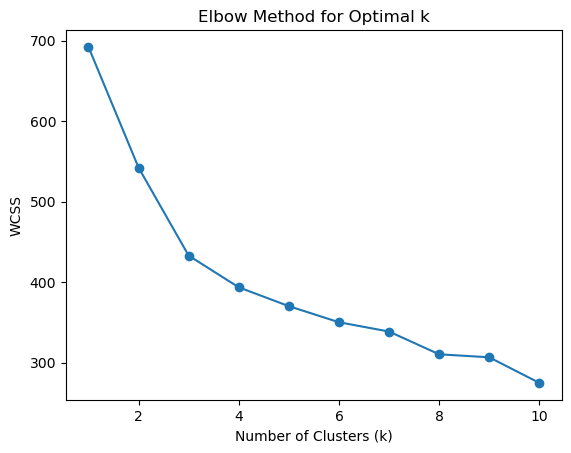

In [113]:
# Plot elbow curve
plt.plot(range(1, 11), wcss, marker='o')             # Plot k vs WCSS
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

In [115]:
kmeans = KMeans(n_clusters=3, random_state=42)   # Initialize with 3 clusters
data['Cluster'] = kmeans.fit_predict(X_processed) 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [117]:
if 'Label' in data.columns:
    # Define features (X) and target (y)
    X = X_processed                                # Features already preprocessed
    y = data['Label']                                

 # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 # ---- Naive Bayes ----
    nb = GaussianNB()                              # Initialize Naive Bayes
    nb.fit(X_train.toarray(), y_train)            
    y_pred_nb = nb.predict(X_test.toarray())       

    # Evaluate NB
    print("Naive Bayes Classification Report:")
    print(classification_report(y_test, y_pred_nb))

    # ---- Support Vector Machine (SVM) ----
    svm = SVC(kernel='linear', random_state=42)   # Initialize SVM with linear kernel
    svm.fit(X_train, y_train)                     # Train SVM
    y_pred_svm = svm.predict(X_test)              # Predict on test set

    # Evaluate SVM
    print("SVM Classification Report:")
    print(classification_report(y_test, y_pred_svm))  # Precision, Recall, F1

    # Confusion matrix
    print("Confusion Matrix (SVM):")
    print(confusion_matrix(y_test, y_pred_svm))

In [119]:
if 'Label' in data.columns:
    scores = cross_val_score(svm, X, y, cv=10, scoring='f1')   # 10-fold CV with F1 score
    print("10-Fold Cross Validation F1 Score (SVM):", scores.mean())